In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
  # Change to correct filename

# Display basic info


# Check for missing values


# Drop duplicate rows if any



In [27]:
df = pd.read_csv("/content/sample_data/heart.csv")

In [28]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [29]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [30]:
df.drop_duplicates(inplace=True)

<ipython-input-31-34a7ea6ec397>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette="coolwarm")


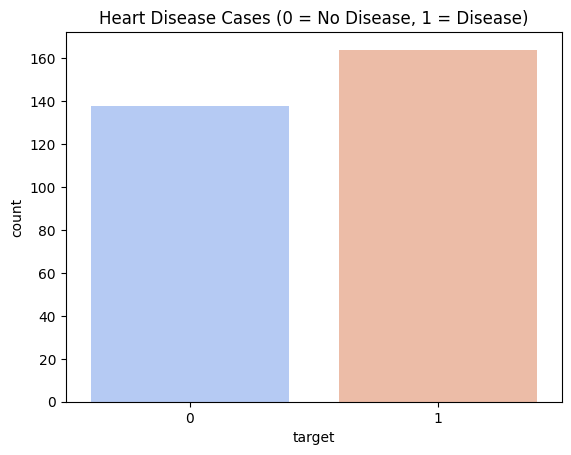

In [31]:
sns.countplot(x=df['target'], palette="coolwarm")
plt.title("Heart Disease Cases (0 = No Disease, 1 = Disease)")
plt.show()


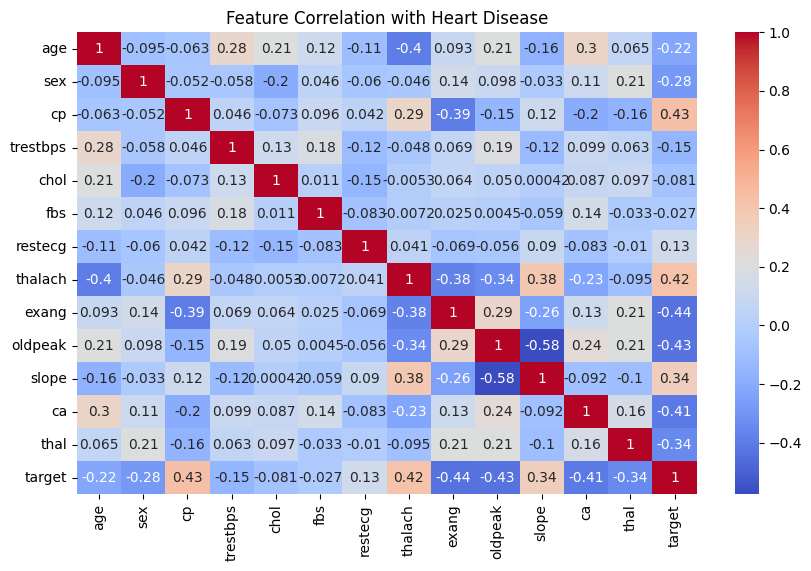

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Heart Disease")
plt.show()


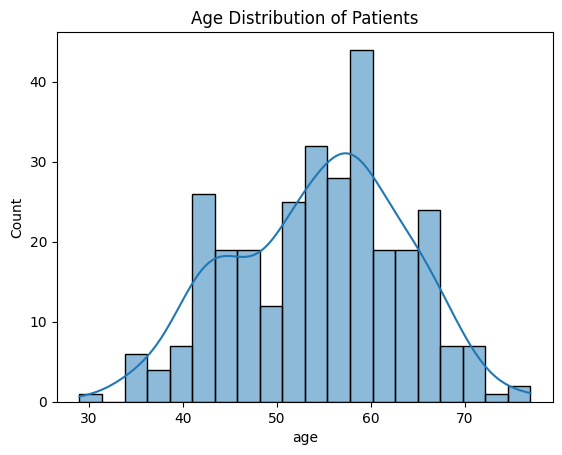

In [33]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.show()


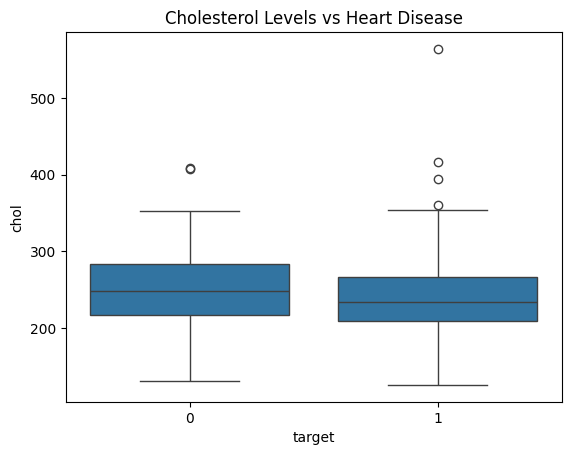

In [34]:
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol Levels vs Heart Disease")
plt.show()


In [35]:
X = df.drop(columns=['target'])

# Normalize data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

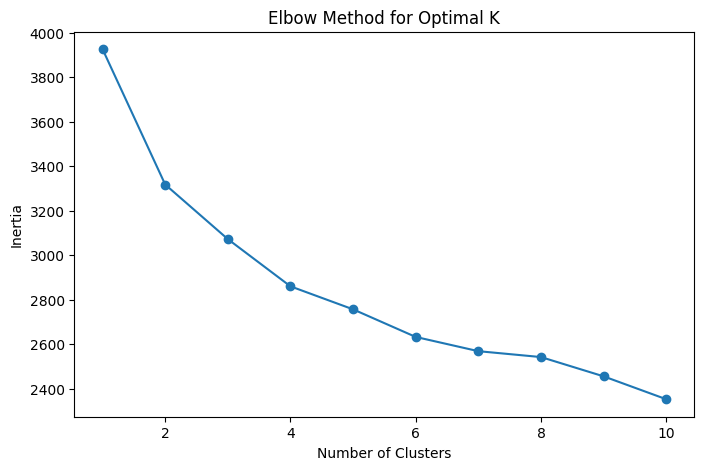

In [37]:
inertia = []
K_range = range(1, 11)  # Test 1-10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


<ipython-input-38-e5192d551f96>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette='viridis')


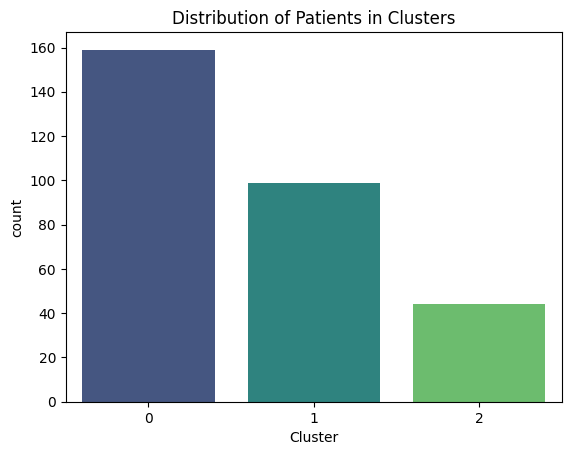

In [38]:
# Choose optimal K (e.g., from Elbow Method)
optimal_k = 3  # Adjust based on elbow method result

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View Cluster Distribution
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title("Distribution of Patients in Clusters")
plt.show()


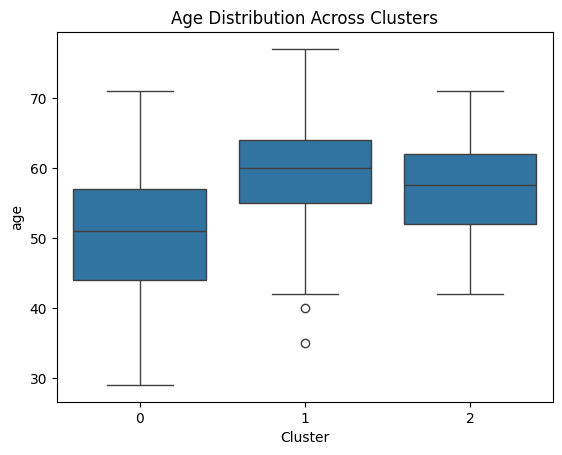

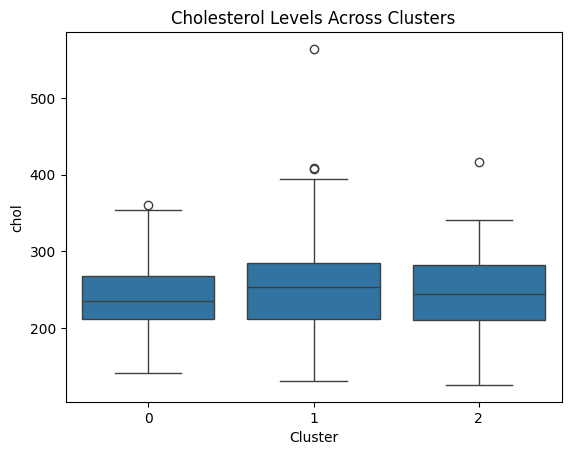

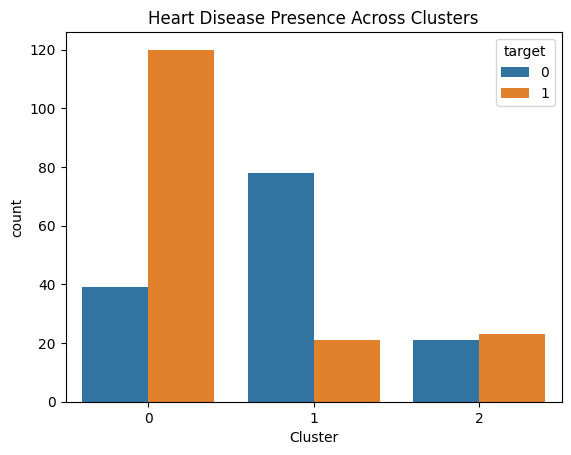

In [39]:
import seaborn as sns

sns.boxplot(x="Cluster", y="age", data=df)
plt.title("Age Distribution Across Clusters")
plt.show()

sns.boxplot(x="Cluster", y="chol", data=df)
plt.title("Cholesterol Levels Across Clusters")
plt.show()

sns.countplot(x=df['Cluster'], hue=df['target'])
plt.title("Heart Disease Presence Across Clusters")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Normalize numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Deep Learning Model Accuracy:", acc)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4489 - loss: 0.8465 - val_accuracy: 0.5410 - val_loss: 0.7704
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6042 - loss: 0.6879 - val_accuracy: 0.5902 - val_loss: 0.7214
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.6007 - val_accuracy: 0.6066 - val_loss: 0.6846
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5386 - val_accuracy: 0.6230 - val_loss: 0.6548
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8064 - loss: 0.4930 - val_accuracy: 0.6557 - val_loss: 0.6311
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7951 - loss: 0.4776 - val_accuracy: 0.6885 - val_loss: 0.6152
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.4029 - val_accuracy: 0.6885 - val_loss: 0.5972
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8139 - loss: 0.4161 - val_accuracy: 0.7049 - val_loss: 0.5864
Epo